In [1]:
import asyncio
import threading
import time
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from src.kinetic_mount_controller import KineticMountControl
from src.time_tagger import TT_Simulator, two_particle_states
%matplotlib widget

In [1]:
def setup():

    #KMC = KineticMountController(number_of_devices=3)
    pass

def performance_loop():
    pass

KMC = KineticMountControl(number_of_devices=3)

NameError: name 'KineticMountControl' is not defined

In [5]:
roA, shutter, roB = KMC1.devices
roA.home()
roB.home()
shutter.home()


ASSIGNING CONTROLLER
---------------------------------------------------------------
COM9 unavailable.

Ports Found: []


Exception: 

No ports found. Make sure Controller is plugged in


In [14]:
shutter.open()
aA = 0
while True:
    roB.set_angle(aA)
    aA += 5

KeyboardInterrupt: 

In [4]:
# Setup kinetic mounts and calibrate
setup()

# Setup Simulator
TTSim = TT_Simulator(two_particle_states['phi_plus'], initial_state_noise=0, debug=True)



TIME-TAGGER SIMULATOR
---------------------------------------------------------------
Initialising . . .

For the initial state:
Matrix([[sqrt(2)/2], [0], [0], [sqrt(2)/2]])

The correlation function has the form:
cos(2*theta_a - 2*theta_b)

We find the following optimal CHSH angles (in multiples of pi):
a0:	0.0000, a1:	-0.2500
b0:	-0.1250, b1:	0.1250

And measurements taken at this angle will produce as CHSH value S of
S = 2.8284 ( 100% of S_bell )

---------------------------------------------------------------


In [5]:
a_angles = TTSim.CHSH_angles[:2]
b_angles = TTSim.CHSH_angles[2:]
print([x * 180/np.pi for x in TTSim.CHSH_angles])

for _ in range(10):
    print(TTSim.measure_n_entangled_pairs(1000, np.random.choice(a_angles), np.random.choice(b_angles)))


[0.0, -44.99765161562661, -22.49651806456107, 22.50037066640107]
[ 73 412 444  71]
[432  80  72 416]
[428  66  74 432]
[424  69  81 426]
[431  80  84 405]
[410  74  81 435]
[425  69  66 440]
[426  75  76 423]
[435  91  59 415]
[408  67  97 428]


In [6]:
def set_angles_simultaneously(a_hwp, b_hwp, angle1, angle2):
    """
    Does not actually work simultaneously yet because can not handle responses from controller asynchronously without errors
    But it is still slighly faster than just running back to back
    """
    thread_a = threading.Thread(target=a_hwp.set_angle, args=(angle1,))
    thread_b = threading.Thread(target=b_hwp.set_angle, args=(angle2,))

    # Start both threads
    thread_a.start()
    thread_b.start()

    # Wait for both threads to complete
    thread_a.join()
    thread_b.join()

while True:
    theta_a = np.random.choice(a_angles) * 90 / np.pi
    theta_b = np.random.choice(b_angles) * 90 / np.pi

    # move filters, convert from radians and convert from polarisation orientation to filter angle (/2)
    set_angles_simultaneously(roA, roB, theta_a, theta_b)

AttributeError: 'Shutter' object has no attribute 'set_angle'

In [8]:
#roA.set_angle(0)

-0.0075

Button(description='Start Simulation', style=ButtonStyle())

Button(description='Stop Simulation', style=ButtonStyle())

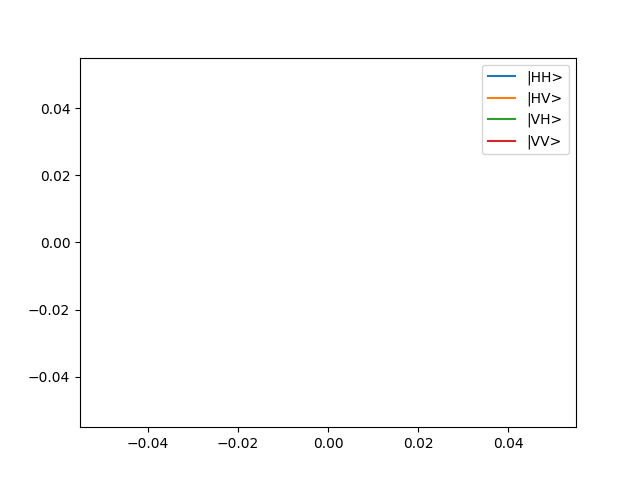

-22.498825807813304 -11.248259032280535
-22.498825807813304 -11.248259032280535
0.0 -11.248259032280535
-22.498825807813304 11.250185333200536
0.0 11.250185333200536
0.0 -11.248259032280535
-22.498825807813304 11.250185333200536
0.0 -11.248259032280535
0.0 -11.248259032280535
0.0 11.250185333200536
-22.498825807813304 -11.248259032280535
0.0 -11.248259032280535
-22.498825807813304 -11.248259032280535
0.0 -11.248259032280535
-22.498825807813304 -11.248259032280535
0.0 -11.248259032280535
-22.498825807813304 11.250185333200536
-22.498825807813304 11.250185333200536
0.0 11.250185333200536
-22.498825807813304 -11.248259032280535
-22.498825807813304 11.250185333200536
0.0 -11.248259032280535
-22.498825807813304 -11.248259032280535
-22.498825807813304 -11.248259032280535
-22.498825807813304 11.250185333200536
-22.498825807813304 11.250185333200536
0.0 -11.248259032280535
-22.498825807813304 -11.248259032280535
0.0 11.250185333200536
-22.498825807813304 -11.248259032280535
Simulation stopped.

In [12]:
# Define a flag
stop_simulation = False

def run_simulation():
    global stop_simulation
    data = []
    i = 0
    while not stop_simulation:
        # Simulate data generation
        theta_a = np.random.choice(a_angles)
        theta_b = np.random.choice(b_angles)

        # move filters, convert from radians and convert from polarisation orientation to filter angle (/2)
        #roA.set_angle(theta_a * 90/np.pi)
        #roB.set_angle(theta_b * 90/np.pi)

        print(theta_a*90/np.pi, theta_b*90/np.pi)

        new_data = TTSim.measure_n_entangled_pairs(200, theta_a, theta_b)
        data.append(new_data)
        i += 1
        time.sleep(0.01)  # simulate delay
        yield new_data  # yield data for real-time plotting
        
        if i >= 1000:  # Optional: stop after 100 iterations
            break
    print("Simulation stopped.")
    
# Start the thread
def start_thread():
    global stop_simulation
    stop_simulation = False
    thread = threading.Thread(target=threaded_simulation)
    thread.start()

# Function to update the plot
def update_plot(data):
    lineHH.set_xdata(list(range(len(data))))
    lineHH.set_ydata([x[0] for x in data])
    lineHV.set_xdata(list(range(len(data))))
    lineHV.set_ydata([x[1] for x in data])
    lineVH.set_xdata(list(range(len(data))))
    lineVH.set_ydata([x[2] for x in data])
    lineVV.set_xdata(list(range(len(data))))
    lineVV.set_ydata([x[3] for x in data])
    ax.relim()
    ax.autoscale_view()
    fig.canvas.draw()

# Thread function to run simulation and update plot
def threaded_simulation():
    data = []
    for value in run_simulation():
        data.append(value)
        update_plot(data)

# Interactive controls
def stop_thread():
    global stop_simulation
    stop_simulation = True

fig, ax = plt.subplots()
lineHH, = ax.plot([], [], label=r"|HH>")
lineHV, = ax.plot([], [], label=r"|HV>")
lineVH, = ax.plot([], [], label=r"|VH>")
lineVV, = ax.plot([], [], label=r"|VV>")

ax.legend(loc='upper right')

# Adding buttons to control simulation
start_button = widgets.Button(description="Start Simulation")
stop_button = widgets.Button(description="Stop Simulation")

start_button.on_click(lambda x: start_thread())
stop_button.on_click(lambda x: stop_thread())

display(start_button, stop_button)

# TODO
# implement a gauge that shows the current S value based on the measurements already done. Should have a line that differentiates classical from quantum
